# Mini Proyecto 3

## Implementación y visualización de k-means en 2D

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('kmeans1.csv')
df

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       400 non-null    float64
 1   B       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [4]:
df.isna().sum()

A    0
B    0
dtype: int64

In [5]:
df.duplicated().sum()

0

explorando nuestro dataset, tenemos que sus variables serán numericas y no hay valores faltantes ni duplicados

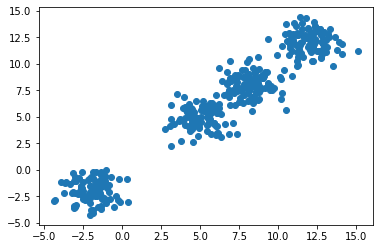

In [6]:
plt.scatter(x='A',y='B',data=df)
plt.show()

In [7]:
k_means = KMeans(n_clusters=2) #probamos con 2 clusters
k_means.fit(df)
print(f"Davies Bouldin Score K-means:   {davies_bouldin_score(df,k_means.labels_)}")

Davies Bouldin Score K-means:   0.3474016130934537


C:\Users\iaace\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


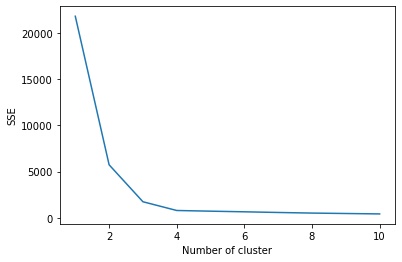

In [8]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
  #cuadrado desde cada punto al centroide del cluster más cercano

sse
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

por la regla del codo, escogemos 4 clusters

In [9]:
k_means = KMeans(n_clusters=4)
k_means.fit(df)

KMeans(n_clusters=4)

In [10]:
df['clase'] = k_means.labels_

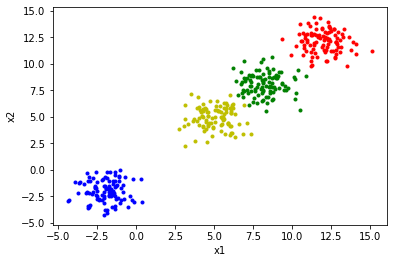

In [11]:
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(df['A'][df['clase']==i],df['B'][df['clase']==i],colores[i])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

## Análisis de clusters

In [12]:
df2 = pd.read_csv('kmeans2.csv', index_col=0) # cargamos los datos
df2

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.04000,0.112777,2,0.340000,0.0040,-0.000014,1.689189,13.335943,0.001613,0.0155,0.420000,0.004724,17.743225
4996,0.21250,0.000000,50,0.463333,-0.0655,-0.000224,11.590296,14.113617,0.009283,0.1250,0.303333,0.018120,1375.234215
4997,0.02175,0.030271,4,0.333333,0.0100,-0.000031,0.014262,14.477476,0.000819,0.0090,0.295238,0.002141,1111.578564
4998,0.02650,0.446972,2,0.313333,0.0030,0.000013,0.140885,13.661500,0.000972,0.0090,0.430000,0.003221,2866.316360


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amplitude         5000 non-null   float64
 1   AndersonDarling   5000 non-null   float64
 2   Autocor_length    5000 non-null   int64  
 3   Beyond1Std        5000 non-null   float64
 4   Gskew             5000 non-null   float64
 5   LinearTrend       5000 non-null   float64
 6   MaxSlope          5000 non-null   float64
 7   Mean              5000 non-null   float64
 8   Meanvariance      5000 non-null   float64
 9   MedianAbsDev      5000 non-null   float64
 10  MedianBRP         5000 non-null   float64
 11  PercentAmplitude  5000 non-null   float64
 12  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 546.9 KB


In [14]:
df2.isna().sum()

Amplitude           0
AndersonDarling     0
Autocor_length      0
Beyond1Std          0
Gskew               0
LinearTrend         0
MaxSlope            0
Mean                0
Meanvariance        0
MedianAbsDev        0
MedianBRP           0
PercentAmplitude    0
PeriodLS            0
dtype: int64

In [15]:
print(df2.duplicated().sum())

0


Vemos que nuestras variables son numericas, que no hay valores faltantes, ni tampoco valores duplicados

In [16]:
df2 = ((df2-df2.min())/(df2.max()-df2.min())) # normalizamos

### K-Means

In [17]:
means = KMeans(n_clusters=2) #ajustamos a un modelo inicial
means.fit(df2)

print(f"Davies Bouldin Score K-means:   {davies_bouldin_score(df2,means.labels_)}")

Davies Bouldin Score K-means:   1.4196802758203695


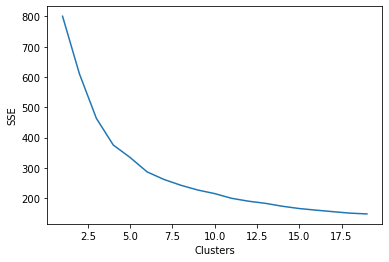

In [18]:
##buscamos la cantidad de clusters que mejor se ajuste a los datos

inertia = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2)
    inertia[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
x=np.array(list(inertia.values()))
x

array([800.488050, 610.219852, 463.632752, 375.676657, 334.337309,
       286.985331, 261.926501, 242.847025, 227.067511, 215.296026,
       199.770764, 190.252240, 183.187323, 173.637575, 166.029774,
       160.695818, 155.646783, 150.853387, 148.304951])

notamos que a partir de 6 clusters, la distancia intraclusters se empieza a mantener constante, por ende escogeremos esa cantidad de clusters.

In [20]:
k_means = KMeans(n_clusters=6)
k_means.fit(df2)
labels_kmeans = k_means.labels_

In [21]:
k_means.cluster_centers_ #exploramos los centros 

array([[0.140902, 0.027434, 0.004752, 0.666248, 0.530755, 0.328065,
        0.020807, 0.642192, 0.101201, 0.101076, 0.251826, 0.111137,
        0.000385],
       [0.059024, 0.035072, 0.128311, 0.611932, 0.546659, 0.327783,
        0.001874, 0.232718, 0.053495, 0.040650, 0.292172, 0.058177,
        0.023513],
       [0.019789, 0.531626, 0.025216, 0.532665, 0.544368, 0.327836,
        0.001914, 0.284747, 0.015252, 0.011939, 0.393778, 0.018630,
        0.022650],
       [0.018607, 0.080632, 0.039473, 0.490182, 0.545192, 0.327750,
        0.002193, 0.281179, 0.014727, 0.009451, 0.469065, 0.020834,
        0.035654],
       [0.583913, 0.017272, 0.189700, 0.664765, 0.497056, 0.318331,
        0.002166, 0.243101, 0.558191, 0.446289, 0.221811, 0.575457,
        0.035157],
       [0.134793, 0.007857, 0.010295, 0.290063, 0.611495, 0.330257,
        0.026621, 0.710594, 0.078784, 0.050710, 0.657793, 0.148843,
        0.001446]])

vemos que cada uno representan a un array de 14 dimensiones.

### Cluster Jerárquico

In [22]:
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram
ac = AC(n_clusters=None, distance_threshold=0) # realizamos el primer ajuste sin clusters

ac.fit(df2)    

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [23]:
def plot_dendrogram(model, **kwargs):
    '''Grafica el dendograma'''

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


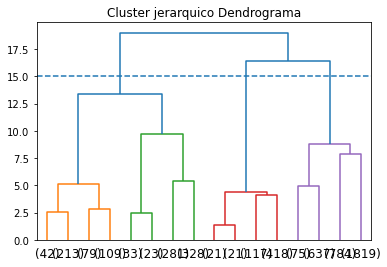

In [24]:
plt.title('Cluster jerarquico Dendrograma') # graficamos nuestro dendongrama

plot_dendrogram(ac, truncate_mode='level', p=3)

plt.axhline(linestyle='--', y=15)
plt.show()

Con esto podemos ver que necesitaremos 4 clusters, así que los ajustamos a ese valor.

In [25]:
ac = AC(n_clusters=4)

ac.fit(df2)
    
labels_ac = ac.labels_

### GMM

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2) # n dimensiones que queremos reducir nuestros datos
pca.fit(df2)
X = pca.transform(df2)
len(X)

5000

<AxesSubplot:xlabel='A', ylabel='B'>

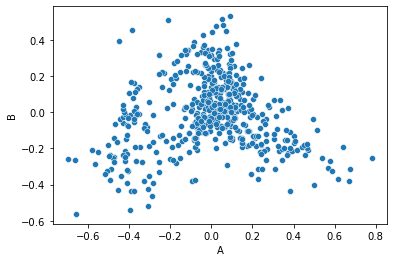

In [28]:
X=pd.DataFrame(X,columns=['A','B'])
x=X.sample(500)
sns.scatterplot(x='A',y='B', data=x)

Text(0.5, 0, 'n_componentes')

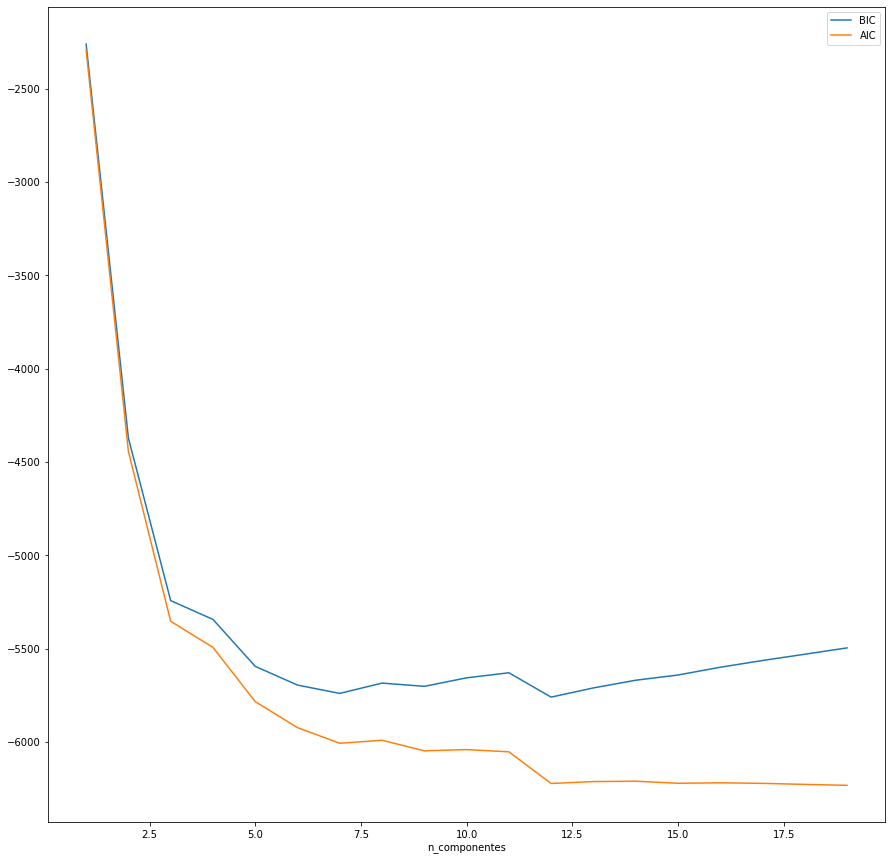

In [29]:
n_componentes = np.arange(1,20)

modelos = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(X)
           for n in n_componentes]
plt.figure(figsize=(15,15))
plt.plot(n_componentes, [ m.bic(X) for m in modelos], label = 'BIC')

plt.plot(n_componentes, [ m.aic(X) for m in modelos], label = 'AIC')

plt.legend(loc='best')
plt.xlabel('n_componentes')

notamos que el valor minimo en BIC se obtiene con 12 clusters, si bien en AIC el minimo no se obtiene en eso, vemos que a partir 12 clusters se empieza a mantener constante.

In [30]:
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state = 0) #ajustamos a 12 clusters
gmm.fit(X)
labels_gmm = gmm.predict(X)
labels_gmm

array([0, 2, 9, ..., 8, 3, 8], dtype=int64)

In [31]:
for i in range(gmm.n_components):
    
    density = mvn(cov = gmm.covariances_[i], mean = gmm.means_[i]).pdf(X)
    print('---------------------')
    print('Gaussiana '+str(i))
    print('Medias')
    print(gmm.means_[i])
    print('Covarianza')
    print(gmm.covariances_[i])


---------------------
Gaussiana 0
Medias
[-0.027542 -0.039601]
Covarianza
[[0.004446 0.001878]
 [0.001878 0.004774]]
---------------------
Gaussiana 1
Medias
[0.157047 -0.029987]
Covarianza
[[0.007116 0.000094]
 [0.000094 0.008173]]
---------------------
Gaussiana 2
Medias
[0.011609 0.255169]
Covarianza
[[0.006351 0.000347]
 [0.000347 0.008566]]
---------------------
Gaussiana 3
Medias
[0.411062 -0.196998]
Covarianza
[[0.018883 -0.008508]
 [-0.008508 0.010680]]
---------------------
Gaussiana 4
Medias
[-0.279606 -0.230228]
Covarianza
[[0.017666 -0.001627]
 [-0.001627 0.011423]]
---------------------
Gaussiana 5
Medias
[0.238982 -0.157075]
Covarianza
[[0.012722 -0.000646]
 [-0.000646 0.022086]]
---------------------
Gaussiana 6
Medias
[-0.380687 0.025486]
Covarianza
[[0.001050 -0.000105]
 [-0.000105 0.004438]]
---------------------
Gaussiana 7
Medias
[-0.153832 0.193557]
Covarianza
[[0.017505 -0.006259]
 [-0.006259 0.030109]]
---------------------
Gaussiana 8
Medias
[0.033008 0.089583]


In [32]:
kmeans_dbs = davies_bouldin_score(df2,labels=labels_kmeans)
gmm_dbs = davies_bouldin_score(df2,labels=labels_gmm)
kmeans_s = silhouette_score(df2,labels=labels_kmeans)
gmm_s = silhouette_score(df2,labels=labels_gmm)
print(f"Davies Bouldin Score K-means:   {kmeans_dbs}")
print(f"Davies Bouldin Score GMM:   {gmm_dbs}")
print(f"Silhouette Score K-means:   {kmeans_s}")
print(f"Silhouette Score GMM:   {gmm_s}")

Davies Bouldin Score K-means:   1.097483096413885
Davies Bouldin Score GMM:   1.818462676806152
Silhouette Score K-means:   0.28040128911857726
Silhouette Score GMM:   0.14571795976998156


Notamos que el que obtiene mejor desempeño es K-Means, esto posiblemente se deba a la caracteristica de los datos (notamos que en las covarianzas de gmm son cercanas a 0) lo que hace que se ajuste mejor a un modelo de K-Means.